# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow


Computer Vision-- practise of writing algorithms which can discover patterns in visual data ex: self driving car recognizing the car in front

## Get the data

The image is from Food101 dataset with 101 different classes of food

The data was modified to 2 classes using image data modification

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-01-12 19:05:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  24.0MB/s    in 5.4s    

2023-01-12 19:06:04 (19.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data


Computer vision --- visualising many samples of data

In [2]:
! ls pizza_steak

test  train


In [3]:
! ls pizza_steak/train

pizza  steak


In [4]:
! ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
! ls pizza_steak/train/steak | wc -l

750


In [6]:
import os

# list number of files in pizza_steak directory
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [7]:
# Another way to find out how many images in a file
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

## To visualize images, first get the class names programmatically

In [8]:
#Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))#created a list of class names
print(class_names)


['pizza' 'steak']


In [9]:
# Visualising the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir,target_class):
  #Setup the target directory 
  target_folder = target_dir+target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

['2154779.jpg']
Image shape: (384, 512, 3)


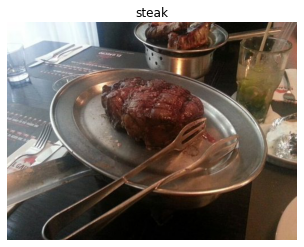

In [10]:
#View random image from training set
img =view_random_image(target_dir="pizza_steak/train/",
                  #target_class="pizza")
                  target_class="steak")

In [11]:
img

array([[[255, 253, 254],
        [255, 253, 254],
        [255, 253, 254],
        ...,
        [109,  95,  82],
        [114, 102,  88],
        [115, 103,  89]],

       [[255, 253, 254],
        [255, 253, 254],
        [255, 253, 254],
        ...,
        [105,  91,  78],
        [118, 104,  91],
        [122, 108,  95]],

       [[255, 253, 254],
        [255, 253, 254],
        [255, 253, 254],
        ...,
        [110,  94,  81],
        [126, 110,  97],
        [125, 109,  96]],

       ...,

       [[ 50,  64,  65],
        [ 48,  62,  63],
        [ 48,  62,  63],
        ...,
        [192, 150, 108],
        [192, 150, 108],
        [190, 148, 106]],

       [[ 51,  65,  65],
        [ 49,  63,  63],
        [ 52,  66,  66],
        ...,
        [192, 150, 108],
        [192, 150, 108],
        [190, 148, 106]],

       [[ 50,  65,  62],
        [ 46,  61,  58],
        [ 52,  67,  64],
        ...,
        [189, 147, 105],
        [188, 146, 104],
        [187, 145, 103]]

In [12]:
#View image shape
img.shape #returns width,height,colour channels

(384, 512, 3)

In [13]:
# Get all the pizel values between 0 and 1
img/255.

array([[[1.        , 0.99215686, 0.99607843],
        [1.        , 0.99215686, 0.99607843],
        [1.        , 0.99215686, 0.99607843],
        ...,
        [0.42745098, 0.37254902, 0.32156863],
        [0.44705882, 0.4       , 0.34509804],
        [0.45098039, 0.40392157, 0.34901961]],

       [[1.        , 0.99215686, 0.99607843],
        [1.        , 0.99215686, 0.99607843],
        [1.        , 0.99215686, 0.99607843],
        ...,
        [0.41176471, 0.35686275, 0.30588235],
        [0.4627451 , 0.40784314, 0.35686275],
        [0.47843137, 0.42352941, 0.37254902]],

       [[1.        , 0.99215686, 0.99607843],
        [1.        , 0.99215686, 0.99607843],
        [1.        , 0.99215686, 0.99607843],
        ...,
        [0.43137255, 0.36862745, 0.31764706],
        [0.49411765, 0.43137255, 0.38039216],
        [0.49019608, 0.42745098, 0.37647059]],

       ...,

       [[0.19607843, 0.25098039, 0.25490196],
        [0.18823529, 0.24313725, 0.24705882],
        [0.18823529, 0

##An end to end example

Lets build a convulational neural network to find patterns in images

1. Load image
2. preprocess images
3. Build CNN to find patterna in images
4. compile CNN
5. Fit CNN to our taining data


In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set seed
tf.random.set_seed(42)


#Preprocess data(get all pixel values between 0 and 1, also called scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup path to the data directories
train_dir ="/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

#Build a CNN model(Same as Tiny VGG on CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


#Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1= model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 207ms/step - loss: 0.5630 - accuracy: 0.7033 - val_loss: 0.4291 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4113 - accuracy: 0.8107 - val_loss: 0.3379 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3884 - accuracy: 0.8213 - val_loss: 0.3965 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3457 - accuracy: 0.8500 - val_loss: 0.3034 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3013 - accuracy: 0.8720 - val_loss: 0.2831 - val_accuracy: 0.8740


**Note** : change run_timw to GPU if one epoch is taking more than 10sec

In [15]:
#Model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Refer : https://poloclub.github.io/cnn-explainer/

## Using the same model as before


replicate the model as same as in before section to see how it works wit image data

model building is from Tensorflow Playground

In [16]:
#Set random seed
tf.random.set_seed(42)

#Create a model to replicate the tensorflow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


#Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


#Fit the model
history_2= model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 198ms/step - loss: 1.0098 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [17]:
# Get summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


With the same parameters and 20X more than CNN model, model_2 performance is terrible.
Lets improve model_2

In [18]:
#Set random seed
tf.random.set_seed(42)

#Create a model to replicate the tensorflow playground model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


#Compile model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


#Fit the model
history_3= model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 177ms/step - loss: 2.8120 - accuracy: 0.6227 - val_loss: 0.8212 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 1.3406 - accuracy: 0.6773 - val_loss: 1.4771 - val_accuracy: 0.6200
Epoch 3/5
47/47 [==============================] - 8s 174ms/step - loss: 1.2305 - accuracy: 0.7107 - val_loss: 0.7432 - val_accuracy: 0.6900
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.5708 - accuracy: 0.7693 - val_loss: 0.4541 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.7280 - accuracy: 0.7400 - val_loss: 0.8485 - val_accuracy: 0.6440


In [19]:
# Get summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification

1. Visualise the data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and imporve model
7. repeat until satisfied

###1. Become/Visualise the data

['296268.jpg']
Image shape: (512, 382, 3)
['1708197.jpg']
Image shape: (512, 512, 3)


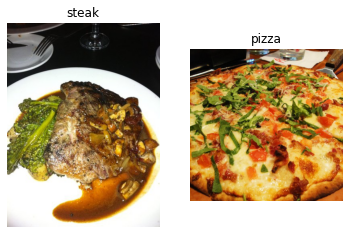

In [20]:
#Visulaise the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

###2. Preprocess the data

In [21]:
#Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

Turn data into batches

Batch- small subset of data. Rather than looking at ~10000 images at one time, the model might only look at 32 at a time. Because:

1. 10,000 images might not fit the memory of processor(GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn well

32 is taken as ideal batch size almost all the time


In [22]:
#Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)


In [23]:
# Load in our image data from directories and train them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size=(224,224),
                                               class_mode ="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
# Get sample of training data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train 
len(images), len(labels)

(32, 32)

In [25]:
#How many batches
len(train_data) # 1500/32

47

In [26]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [27]:
images[7]

array([[[0.30588236, 0.17254902, 0.227451  ],
        [0.34901962, 0.21960786, 0.25490198],
        [0.4039216 , 0.2784314 , 0.2901961 ],
        ...,
        [0.16470589, 0.02745098, 0.1137255 ],
        [0.16862746, 0.01960784, 0.10980393],
        [0.15686275, 0.00784314, 0.10588236]],

       [[0.28235295, 0.14901961, 0.20392159],
        [0.34117648, 0.21176472, 0.24705884],
        [0.42352945, 0.29803923, 0.30980393],
        ...,
        [0.17254902, 0.02352941, 0.1137255 ],
        [0.1764706 , 0.02745098, 0.11764707],
        [0.16078432, 0.01176471, 0.10980393]],

       [[0.2627451 , 0.13725491, 0.19607845],
        [0.3254902 , 0.20000002, 0.24313727],
        [0.41960788, 0.29803923, 0.31764707],
        ...,
        [0.19215688, 0.04313726, 0.1254902 ],
        [0.1764706 , 0.02745098, 0.11764707],
        [0.16862746, 0.03137255, 0.1254902 ]],

       ...,

       [[0.62352943, 0.5803922 , 0.5568628 ],
        [0.6039216 , 0.56078434, 0.5372549 ],
        [0.6039216 , 0

In [28]:
images[7].shape

(224, 224, 3)

In [29]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

###3. Create CNN model(start with a baseline)

baseline is a relatively simple model 

In [30]:
# Make creating model with little easy way
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [32]:
from tensorflow.python.ops.gen_batch_ops import batch
#Create the model(Baseline model)
model_4 = Sequential([
    Conv2D(filters=10, #no of sliding windows across an input(higher=more complex)
           kernel_size=3, #similar to 3X3 - size of sliding window across an input
           strides=1, #similar to 1X1 - size of the step the sliding window takes across an input
           padding="valid", #same if output shape = input shape, ie same=0
           activation="relu",
           input_shape=(224,224,3)), #input layer
     Conv2D(10,3,activation="relu"),
     Conv2D(10,3,activation="relu"),
     Flatten(),
     Dense(1,activation="sigmoid")      #output layer
    ])

#Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])



###4. Fit the model

In [33]:
#Check the length of training and test data generators
len(train_data),len(test_data)

(47, 16)

In [34]:
#Fit the model
history_4 = model_4.fit(train_data, #combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 196ms/step - loss: 1.0509 - accuracy: 0.6627 - val_loss: 0.4222 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4369 - accuracy: 0.8060 - val_loss: 0.3889 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3011 - accuracy: 0.8907 - val_loss: 0.3687 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.1424 - accuracy: 0.9553 - val_loss: 0.3783 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.0506 - accuracy: 0.9893 - val_loss: 0.4984 - val_accuracy: 0.8080


### 5. Evaluate model

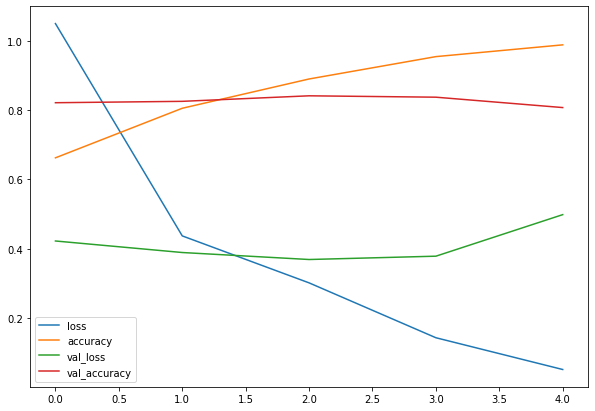

In [36]:

#Lets plot training curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [38]:
#Plot validation and training curves separately
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs, loss, label="Training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="Training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

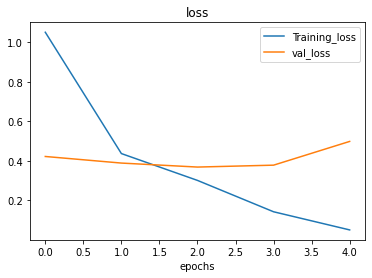

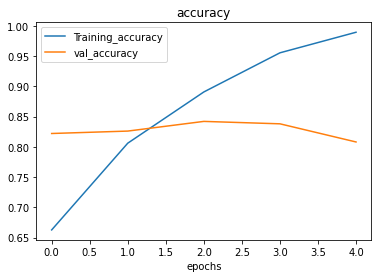

In [39]:
#Check out loss and accuracy of history_4
plot_loss_curves(history_4)


when validation loss starts to increase, its likely that the model is overfitting the training dataset.

### 6. Adjust model parameters

Fitting model comes in 3 steps
0. Create Baseline
1. Beat baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

1. Increase the no of conv layers
2. Increse the no of conv figsize
3. Add another dense layer to output of our flattened layer

Reduce overfitting 
1. Add data augmentation
2. Add regularization data(suchn as MaxPool2D)
3. Add more data


In [55]:
#Create the model(this is going to be the baseline model)
model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [56]:
#Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [57]:
#Fit the model
history_5= model_5.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 187ms/step - loss: 0.5747 - accuracy: 0.7013 - val_loss: 0.3980 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4459 - accuracy: 0.8007 - val_loss: 0.3542 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4391 - accuracy: 0.8080 - val_loss: 0.3324 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.3826 - accuracy: 0.8307 - val_loss: 0.3140 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.3709 - accuracy: 0.8320 - val_loss: 0.3274 - val_accuracy: 0.8620


In [58]:
#Get summary of model_5
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 10)      

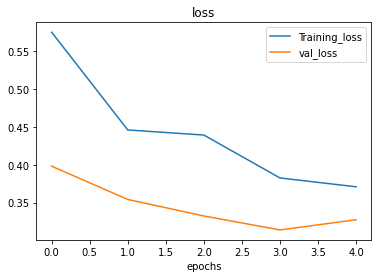

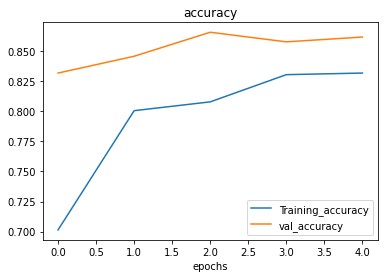

In [59]:
#Plot loss curve
plot_loss_curves(history_5)

### Opening bag of tricks and finding data augmentation

In [76]:
# Create ImageDataGenerator training instanc eiwth data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range=0.2, #how much the image needs to be rotated
                                             shear_range=0.2, #how much shear the image
                                             zoom_range=0.2, #zoom in randomly
                                             width_shift_range=0.2, #move image around x axis
                                             height_shift_range=0.2, #move image around y axis
                                             horizontal_flip=True) #filp an image

#Create ImageDataGenrator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

#Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)

Data augmentation is the process of altering the training data, leading it to have more diversity and in turn allowing the models to learn more generalizable patterns.
Altering might mean adjusting the rotation of an image,flipping it, cropping it etc

Code for data augmentation

In [77]:
#Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)

#Create non-augmented train data batches
print("Non Augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)


#Create non-augmented test data batch
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)


Augmented training data
Found 1500 images belonging to 2 classes.
Non Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


Data Augmentation is usually performed on training data.

Visualise some augmented Data

In [78]:
#Get sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()


showing image number :23


(-0.5, 223.5, 223.5, -0.5)

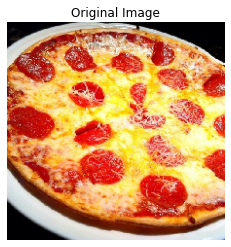

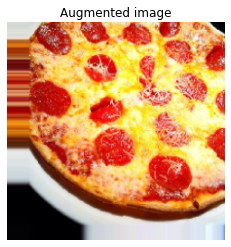

In [80]:
#Show original images and augmented images
import random
random_number = random.randint(0,32)
print(f"showing image number :{random_number}")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)

Build a model on augmented Data

In [82]:
#Create a model(same as model_5)
model_6 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

#Compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 488ms/step - loss: 0.7304 - accuracy: 0.4460 - val_loss: 0.6885 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 21s 452ms/step - loss: 0.6904 - accuracy: 0.5713 - val_loss: 0.6688 - val_accuracy: 0.6820
Epoch 3/5
47/47 [==============================] - 21s 454ms/step - loss: 0.6744 - accuracy: 0.6060 - val_loss: 0.6180 - val_accuracy: 0.7620
Epoch 4/5
47/47 [==============================] - 21s 450ms/step - loss: 0.6384 - accuracy: 0.6487 - val_loss: 0.5316 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 21s 450ms/step - loss: 0.6226 - accuracy: 0.6460 - val_loss: 0.5024 - val_accuracy: 0.8040


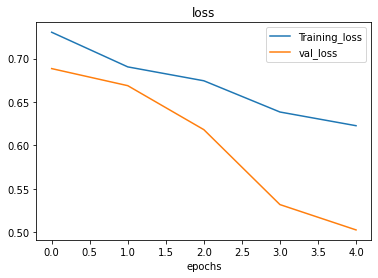

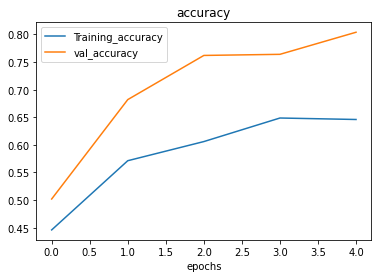

In [83]:
#Check model training curves
plot_loss_curves(history_6)

Shuffle the augmented training data and train another model same as before

In [85]:
#Import data and augment and shuffle from training dir
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True) #shuffle data


Found 1500 images belonging to 2 classes.


In [89]:
#Create model(same as model_5 and Model_6)
model_7 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

#Compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 464ms/step - loss: 0.6578 - accuracy: 0.5967 - val_loss: 0.5344 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 21s 457ms/step - loss: 0.5527 - accuracy: 0.7180 - val_loss: 0.4176 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 21s 454ms/step - loss: 0.4974 - accuracy: 0.7567 - val_loss: 0.4521 - val_accuracy: 0.7980
Epoch 4/5
47/47 [==============================] - 22s 478ms/step - loss: 0.5131 - accuracy: 0.7613 - val_loss: 0.3817 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 22s 476ms/step - loss: 0.4840 - accuracy: 0.7727 - val_loss: 0.3779 - val_accuracy: 0.8180


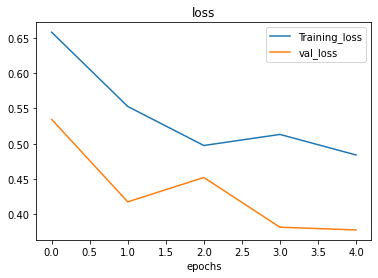

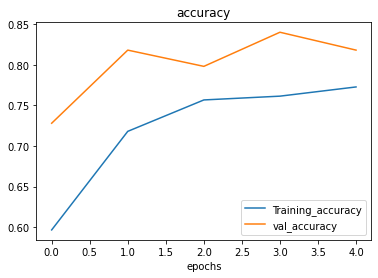

In [90]:
#Plot loss curves
plot_loss_curves(history_7)

### 7. Repeat Until satisfied

Steps to improve model
1. Increase no of model layers(Conv2D and MaxPool2D)
2. Increase no of filters in each convolutional layers
3. Train for longer(more epochs)
4. Find an ideal learning rate
5. Get more data
6. Use transfer learning to leverage what another image model has learn and adjust it

## Making Prediction with our trained model on our own custom data

In [91]:
#Classes we are working with
print(class_names)

['pizza' 'steak']


--2023-01-12 21:21:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.2’

03-steak.jpeg.2     100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2023-01-12 21:21:50 (185 MB/s) - ‘03-steak.jpeg.2’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

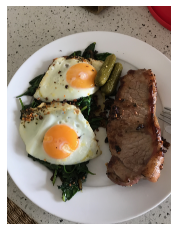

In [95]:
#View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [96]:
#Check the shape of image
steak.shape

(4032, 3024, 3)

When you want to predict the model with your own image, make sure the image is preprocessed into the same format as the data the model was trained on

In [104]:
#Create a function to import and image and resize it to be able to mbe used wit model
def load_and_prep_image(filename, img_shape=224):
  #Read in the image
  img = tf.io.read_file(filename)
  #Decode the read file into a tensor
  img = tf.image.decode_image(img)
  #Resize image
  img = tf.image.resize(img, size=[img_shape,img_shape])
  #Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [106]:
#Load in and preprocess or custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [109]:
pred =model_7.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 56ms/step


The ouput is probability, lets visualize the image as well as model predictions

In [108]:
#Remind of the class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [110]:
#Index predicted class by rounding the prediction probability and indexing it on class name
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [111]:
def pred_and_plot(model,filename,class_names=class_names):
  #Import the target image and preprocess it
  img = load_and_prep_image(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  #Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 29ms/step


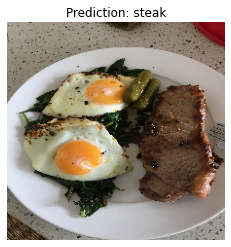

In [112]:
#Test model on custom image
pred_and_plot(model_7,"03-steak.jpeg")

Model works as expected and will try on another image - pizza

--2023-01-12 21:43:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2023-01-12 21:43:18 (154 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 16ms/step


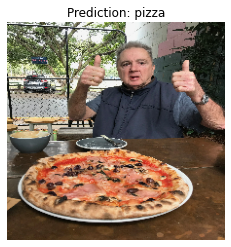

In [113]:
#Download another test custom image and make prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7,"03-pizza-dad.jpeg")

# Multi-class Image Classification


1. Become one with the data
2. Preprocess the data
3. Create a model
4. Fit the model(overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model
7. Repeat until satisfied

### 1. import and become one with data

In [115]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#Unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-01-12 21:49:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.2MB/s    in 23s     

2023-01-12 21:49:58 (21.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [116]:
import os

#walk. through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.

In [117]:
#Steup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [119]:
#Lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1168726.jpg']
Image shape: (384, 512, 3)


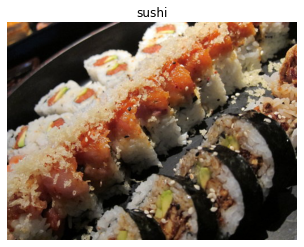

In [128]:
#Visualise 
import random
img = view_random_image(target_dir=train_dir,
                                      target_class = random.choice(class_names))

### 2. Preprocess the data

In [129]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

#Load data in from directories and turn it to batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


###3. Create a model(start with baseline)

In [133]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,MaxPool2D,Dense,Activation

#1. Create the model
model_8 = Sequential([
    Conv2D(10,3 ,input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax") #change to have 10 output neurons (bcz Class_names)
])

#2. Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



###4. Fit the Model

In [134]:
#Fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 190ms/step - loss: 2.1041 - accuracy: 0.2417 - val_loss: 1.9986 - val_accuracy: 0.2880
Epoch 2/5
235/235 [==============================] - 47s 201ms/step - loss: 1.8665 - accuracy: 0.3516 - val_loss: 1.9035 - val_accuracy: 0.3276
Epoch 3/5
235/235 [==============================] - 44s 189ms/step - loss: 1.4880 - accuracy: 0.5005 - val_loss: 1.9828 - val_accuracy: 0.3256
Epoch 4/5
235/235 [==============================] - 44s 186ms/step - loss: 0.8911 - accuracy: 0.7125 - val_loss: 2.4748 - val_accuracy: 0.2900
Epoch 5/5
235/235 [==============================] - 45s 193ms/step - loss: 0.3340 - accuracy: 0.8992 - val_loss: 3.7255 - val_accuracy: 0.2776


###5. Evaluate the model

In [135]:
# Evaluate on test data
model_8.evaluate(test_data)

79/79 [==============================] - 12s 153ms/step - loss: 3.7255 - accuracy: 0.2776


[3.725527763366699, 0.2775999903678894]

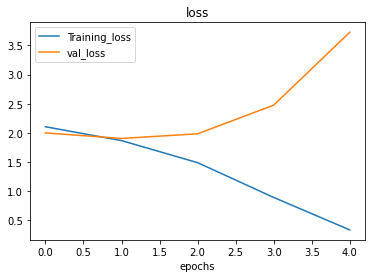

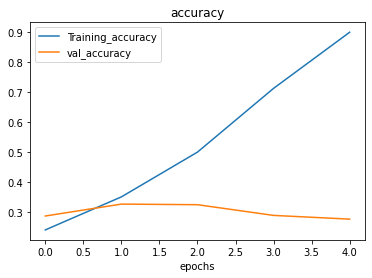

In [136]:
#Check out models loss curve
plot_loss_curves(history_8)

From this loss curves, the model_8 is overfitting.

### 6. Adjust the model hyperparameters

Lets reduce overfitting by
1. Get more data
2. Simplify the model
3. Data Augmentation
4. Use transfer learning

In [138]:
# Simplify model first
#lets remove 2 convolutional layer

model_9 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation ="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


In [139]:
#Fit the model with 2X conv layer removed
history_9 = model_9.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 183ms/step - loss: 2.1421 - accuracy: 0.2504 - val_loss: 1.9491 - val_accuracy: 0.3296
Epoch 2/5
235/235 [==============================] - 47s 201ms/step - loss: 1.7333 - accuracy: 0.4165 - val_loss: 1.8966 - val_accuracy: 0.3384
Epoch 3/5
235/235 [==============================] - 43s 182ms/step - loss: 1.3418 - accuracy: 0.5636 - val_loss: 2.0329 - val_accuracy: 0.3268
Epoch 4/5
235/235 [==============================] - 43s 181ms/step - loss: 0.8835 - accuracy: 0.7259 - val_loss: 2.2495 - val_accuracy: 0.3192
Epoch 5/5
235/235 [==============================] - 51s 216ms/step - loss: 0.5134 - accuracy: 0.8541 - val_loss: 2.6962 - val_accuracy: 0.3012


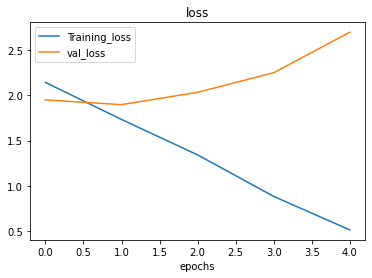

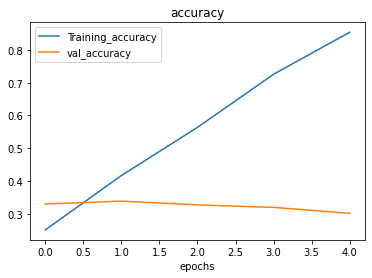

In [140]:
#Check the loass curves
plot_loss_curves(history_9)

Looks like simplifing model didnt work, so trying data augmentation

### Trying to reduce overfitting with data augmentation

In [142]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode = "categorical")

Found 7500 images belonging to 10 classes.


In [143]:
#Create another model  and fit it on augmented data

model_10 = tf.keras.models.clone_model(model_8)

#Compile the cloned model
model_10.compile(loss ="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])



In [144]:
#Fit the model in augmented data
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch = len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 112s 473ms/step - loss: 2.2576 - accuracy: 0.1575 - val_loss: 2.0801 - val_accuracy: 0.2576
Epoch 2/5
235/235 [==============================] - 110s 468ms/step - loss: 2.1161 - accuracy: 0.2357 - val_loss: 2.0230 - val_accuracy: 0.2956
Epoch 3/5
235/235 [==============================] - 108s 458ms/step - loss: 2.0507 - accuracy: 0.2777 - val_loss: 1.9177 - val_accuracy: 0.3356
Epoch 4/5
235/235 [==============================] - 109s 462ms/step - loss: 2.0096 - accuracy: 0.2933 - val_loss: 1.8583 - val_accuracy: 0.3552
Epoch 5/5
235/235 [==============================] - 109s 462ms/step - loss: 1.9671 - accuracy: 0.3173 - val_loss: 1.8630 - val_accuracy: 0.3588


In [145]:
model_8.evaluate(test_data)

79/79 [==============================] - 15s 193ms/step - loss: 3.7255 - accuracy: 0.2776


[3.725527048110962, 0.2775999903678894]

In [146]:
model_10.evaluate(test_data)

79/79 [==============================] - 14s 174ms/step - loss: 1.8630 - accuracy: 0.3588


[1.8630400896072388, 0.3587999939918518]

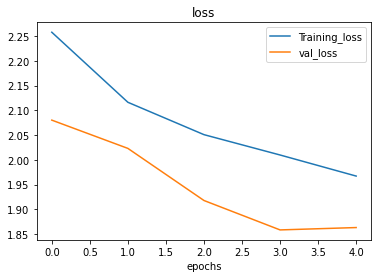

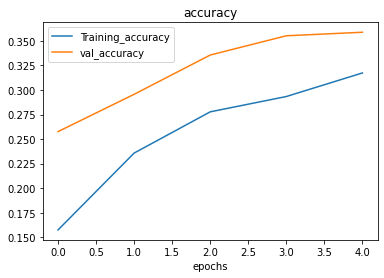

In [147]:
#Plot loss curves 
plot_loss_curves(history_10)

Looks much better and loss curves are much closer and heading in the right direction, we may have to train longer to get better results

### 7. Repeat until satisfied

1. Try restructing model architectures(increasing layers/hidden units)
2. adjust learning rate
3. try different methods of data augmentation
4. Increase epochs
5. Try transfer learning

### Make prediction with the trained model

make predictions on custom images

In [149]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [150]:
#Download custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


--2023-01-12 23:03:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.009s  

2023-01-12 23:03:21 (292 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2023-01-12 23:03:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, await

In [155]:
#Reconfig the pred_and_plot function to include multiclass predictions
def pred_and_plot(model,filename,class_names=class_names):

  #Import the target image and preprocess it
  img = load_and_prep_image(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  #Add in logic for multi class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 16ms/step


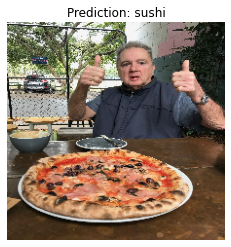

In [156]:
# Make a prediction using model_10
pred_and_plot(model_10,"03-pizza-dad.jpeg",class_names)

1/1 [==============================] - 0s 15ms/step


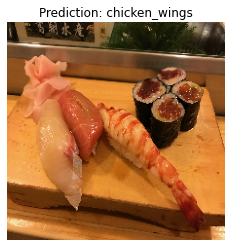

In [157]:
pred_and_plot(model_10,"03-sushi.jpeg",class_names)

Looks like model didnt perform really well in custom image as the accuracy is very less

### Saving and loading model

In [158]:
#Save model
model_10.save("saved_trained_model_10")

In [159]:
#Load in trained model and evaluate 
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")

In [160]:
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 13s 163ms/step - loss: 1.8630 - accuracy: 0.3588


[1.8630400896072388, 0.3587999939918518]

In [161]:
model_10.evaluate(test_data)

79/79 [==============================] - 12s 152ms/step - loss: 1.8630 - accuracy: 0.3588


[1.8630396127700806, 0.3587999939918518]